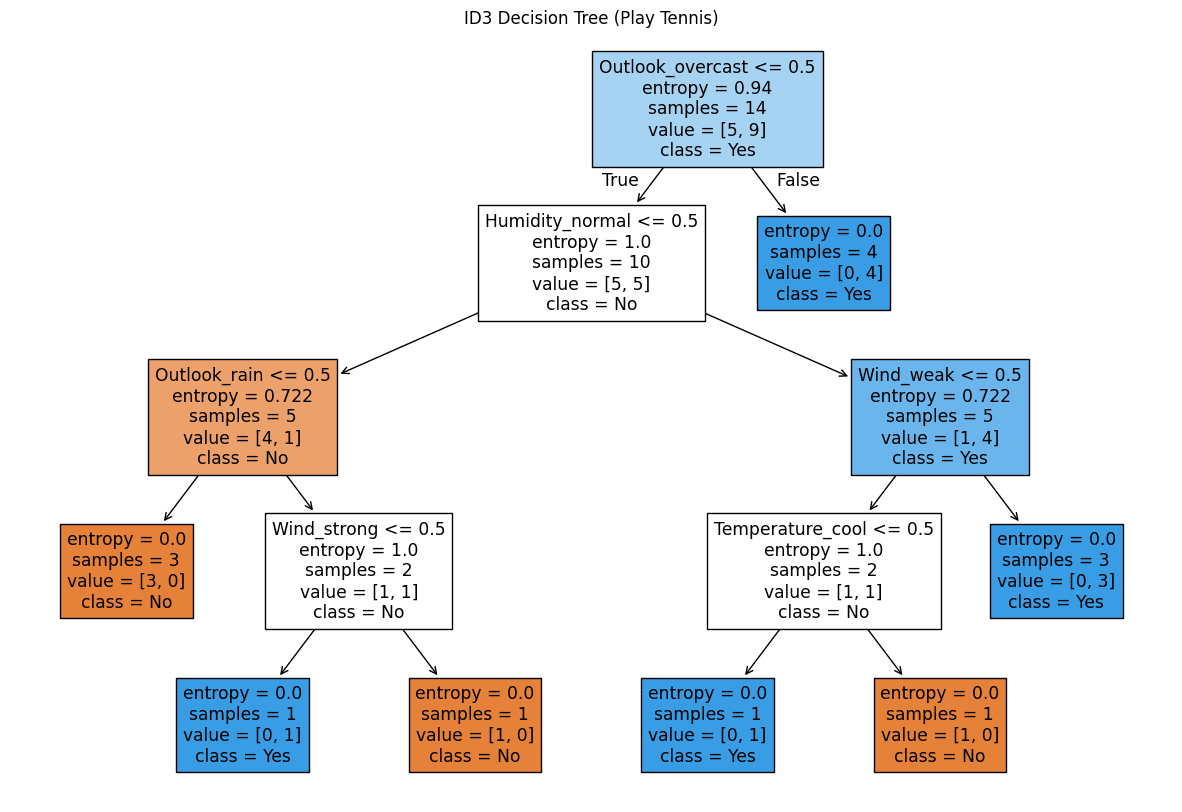

ID3 Decision Tree:
 |--- Outlook_overcast <= 0.50
|   |--- Humidity_normal <= 0.50
|   |   |--- Outlook_rain <= 0.50
|   |   |   |--- class: 0
|   |   |--- Outlook_rain >  0.50
|   |   |   |--- Wind_strong <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Wind_strong >  0.50
|   |   |   |   |--- class: 0
|   |--- Humidity_normal >  0.50
|   |   |--- Wind_weak <= 0.50
|   |   |   |--- Temperature_cool <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Temperature_cool >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Wind_weak >  0.50
|   |   |   |--- class: 1
|--- Outlook_overcast >  0.50
|   |--- class: 1


CART Decision Tree:
 |--- Outlook_overcast <= 0.50
|   |--- Humidity_normal <= 0.50
|   |   |--- Outlook_rain <= 0.50
|   |   |   |--- class: 0
|   |   |--- Outlook_rain >  0.50
|   |   |   |--- Wind_strong <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Wind_strong >  0.50
|   |   |   |   |--- class: 0
|   |--- Humidity_normal >  0.50
|   |   |--- Wind_weak <= 0.5

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt


file_path = 'id3,c45, cart .csv'
data = pd.read_csv(file_path)


data_encoded = pd.get_dummies(data.drop(columns=['Answer']))
target = data['Answer'].apply(lambda x: 1 if x == 'yes' else 0)


id3_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
id3_model.fit(data_encoded, target)


cart_model = DecisionTreeClassifier(criterion='gini', random_state=0)
cart_model.fit(data_encoded, target)


c45_model =DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
c45_model.fit(data_encoded, target)


id3_text = tree.export_text(id3_model, feature_names=list(data_encoded.columns))
cart_text = tree.export_text(cart_model, feature_names=list(data_encoded.columns))
c45_text = tree.export_text(c45_model, feature_names=list(data_encoded.columns))

plt.figure(figsize=(15, 10))
plot_tree(id3_model, feature_names=data_encoded.columns, class_names=["No", "Yes"], filled=True)
plt.title("ID3 Decision Tree (Play Tennis)")
plt.show()

print("ID3 Decision Tree:\n", id3_text)
print("\nCART Decision Tree:\n", cart_text)
print("\nC4.5 Decision Tree:\n", c45_text)
